In [1]:
import evds  as e
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from arch.unitroot import ADF, KPSS
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.filters.hp_filter import hpfilter
from sklearn.metrics import r2_score

In [2]:
with open("C:/Users/htcso/OneDrive/Masaüstü/Untitled Folder/time_series/api_key.txt", "r") as f:
    api = f.read()

In [3]:
evds = e.evdsAPI(api)

In [4]:
data = evds.get_data(["TP.SANAYREV4.Y1"], startdate = "01-11-2010", enddate = "01-05-2023")
data.head()

,Tarih,TP_SANAYREV4_Y1
0,2010-11,70.026895
1,2010-12,85.115386
2,2011-1,70.722680
3,2011-2,68.544243
4,2011-3,79.032632


In [5]:
data.columns = ["Tarih", "SÜE"]

In [6]:
date = pd.date_range("2010-11", periods = len(data), freq = "M")
data["Tarih"] = date
data.set_index("Tarih", inplace = True)
data.head()

,SÜE
Tarih,
2010-11-30,70.026895
2010-12-31,85.115386
2011-01-31,70.722680
2011-02-28,68.544243
2011-03-31,79.032632


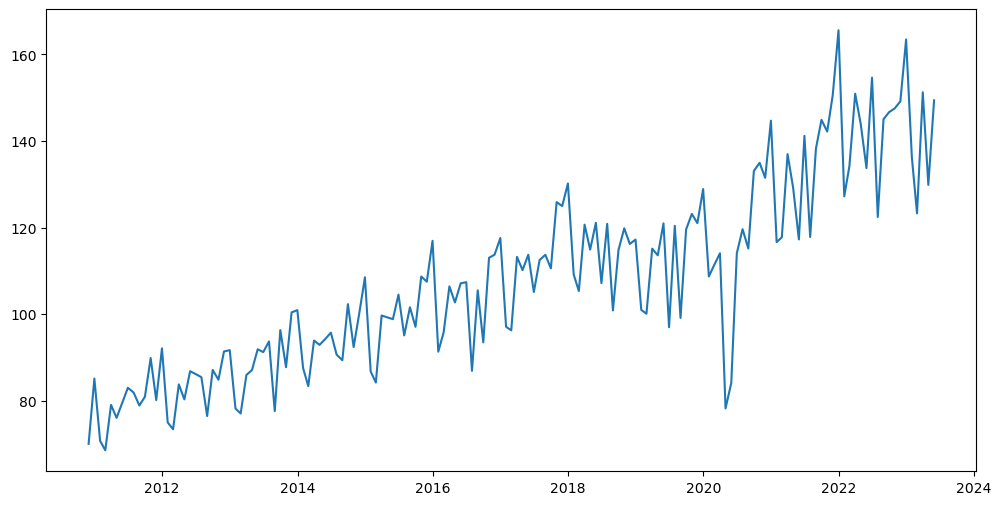

In [7]:
plt.figure(figsize = (12,6))
plt.plot(data)
plt.show();

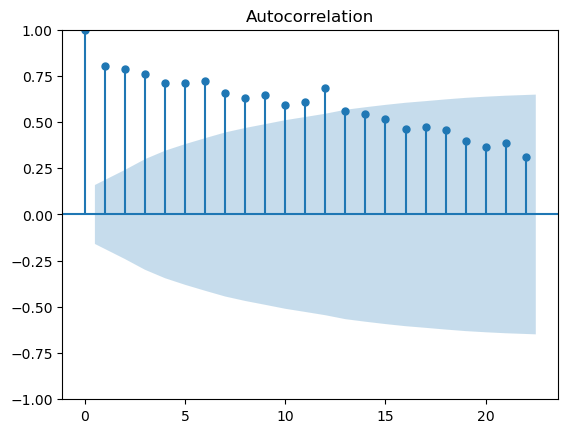

In [8]:
plot_acf(data)
plt.show();

In [9]:
adf = ADF(data, trend = "ct")
adf

Test Statistic,-2.046
P-value,0.576
Lags,13


In [10]:
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     15.28
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           2.40e-21
Time:                        23:27:40   Log-Likelihood:                -476.75
No. Observations:                 137   AIC:                             985.5
Df Residuals:                     121   BIC:                             1032.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.3191      0.156     -2.046      0.043      -0.628      -0.010
Diff.L1       -0.3756      0.167     -2.255      0.026      -0.705      -0.046
Diff.L2       -0.1462      0.172     -0.852      0.396      -0.486       0.193
Diff.L3       -0.1926      0.165     -1.170      0.244      -0.518       0.133
Diff.L4       -0.2211      0.160     -1.381      0.170      -0.538       0.096
Diff.L5       -0.1916      0.158     -1.210      0.229      -0.505       0.122
Diff.L6       -0.0880      0.152     -0.579      0.564      -0.389       0.213
Diff.L7       -0.1363      0.145     -0.937      0.351      -0.424       0.152
Diff.L8       -0.2021      0.140     -1.443      0.152      -0.479       0.075
Diff.L9       -0.0717      0.133     -0.537      0.592      -0.336       0.192
Diff.L10      -0.2080      0.123     -1.685      0.095      -0.452       0.036
Diff.L11      -0.2164      0.116     -1.873      0.064      -0.445       0.012
Diff.L12       0.4219      0.108      3.894      0.000       0.207       0.636
Diff.L13       0.1502      0.097      1.556      0.122      -0.041       0.341
const         25.9636     12.143      2.138      0.035       1.923      50.004
trend          0.1491      0.070      2.141      0.034       0.011       0.287
==============================================================================
Omnibus:                       66.054   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.884
Skew:                          -1.491   Prob(JB):                    9.25e-103
Kurtosis:                      11.569   Cond. No.                     2.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
kpss = KPSS(data, trend = "ct")
kpss

Test Statistic,0.128
P-value,0.081
Lags,6


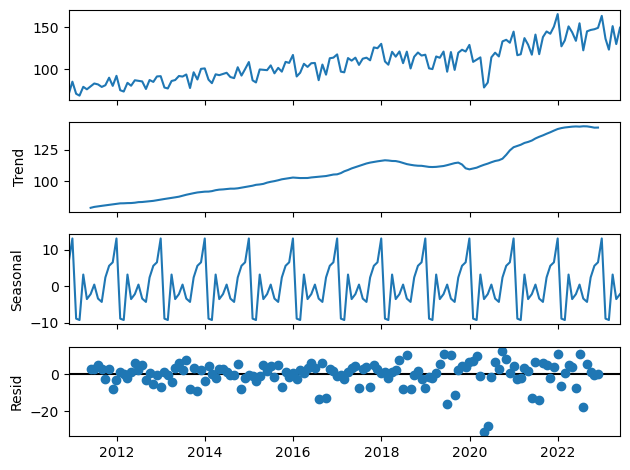

In [12]:
s = seasonal_decompose(data)
s.plot();

In [13]:
x = np.array(range(1, len(data) + 1))
y = data.values

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     505.9
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           9.32e-50
Time:                        23:27:42   Log-Likelihood:                -568.26
No. Observations:                 151   AIC:                             1141.
Df Residuals:                     149   BIC:                             1147.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.1549      1.717     43.192      0.000      70.762      77.547
x1             0.4407      0.020     22.491      0.000       0.402       0.479
==============================================================================
Omnibus:                       30.349   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.173
Skew:                          -0.791   Prob(JB):                     1.06e-17
Kurtosis:                       6.150   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

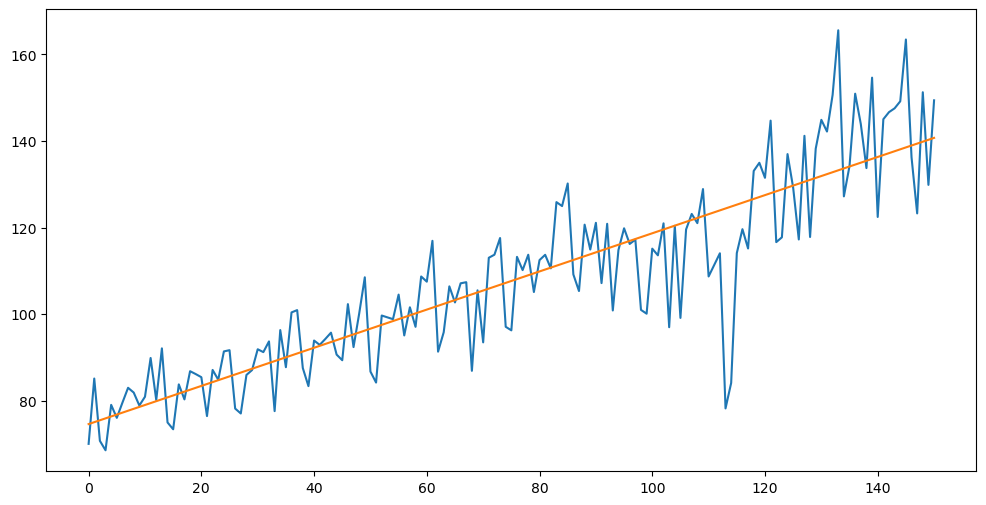

In [14]:
trend = model.predict(x)

plt.figure(figsize = (12,6))
plt.plot(y)
plt.plot(trend)
plt.show();

In [15]:
polmol = PolynomialFeatures(degree = 3)

x = np.array(range(1, len(data) + 1))
x = x[:, np.newaxis]
x_poly = polmol.fit_transform(x)
y = data.values

model = sm.OLS(y, x_poly).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     180.8
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           4.09e-49
Time:                        23:27:43   Log-Likelihood:                -563.37
No. Observations:                 151   AIC:                             1135.
Df Residuals:                     147   BIC:                             1147.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.3715      3.415     21.194      0.000      65.623      79.120
x1             0.7245      0.194      3.736      0.000       0.341       1.108
x2            -0.0061      0.003     -2.063      0.041      -0.012      -0.000
x3          3.105e-05   1.28e-05      2.425      0.016    5.75e-06    5.63e-05
==============================================================================
Omnibus:                       26.582   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.711
Skew:                          -0.744   Prob(JB):                     1.78e-13
Kurtosis:                       5.668   Cond. No.                     5.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

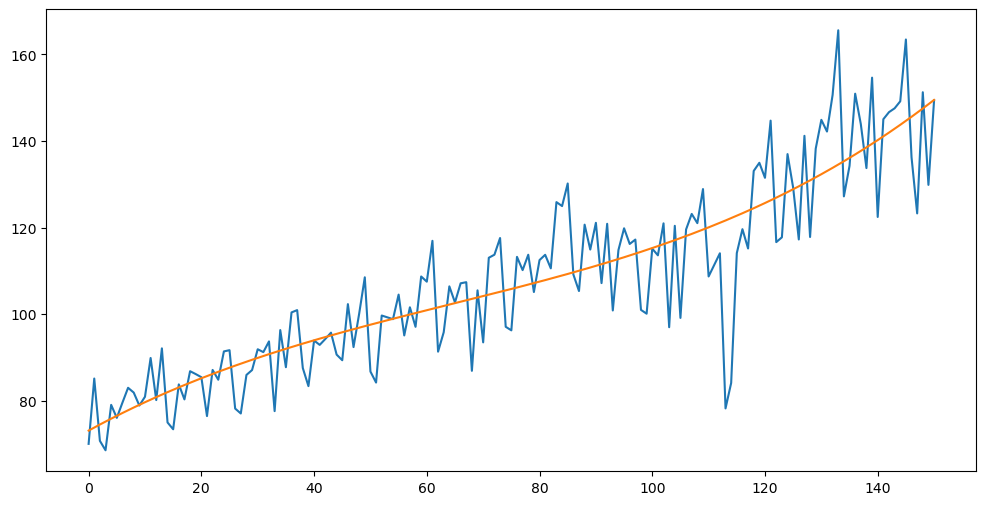

In [16]:
trend = model.predict(x_poly)

plt.figure(figsize = (12,6))
plt.plot(y)
plt.plot(trend)
plt.show();

In [17]:
cy, trend = hpfilter(data, lamb = 14400) #lamb: 100*((bir yıldaki dönem sayısı)^2)
r2 = r2_score(data["SÜE"], trend)
r2

0.8032356424804918

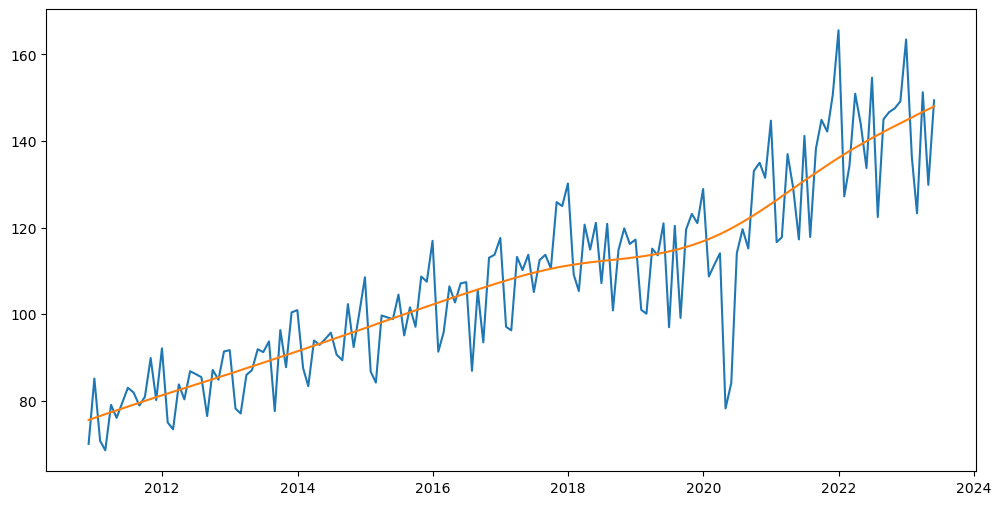

In [18]:
plt.figure(figsize = (12,6))
plt.plot(data)
plt.plot(trend)
plt.show();

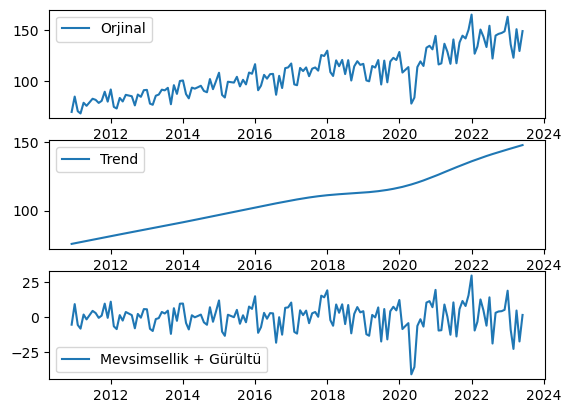

In [19]:
no_trend = data["SÜE"] - trend

fig, ax = plt.subplots(3,1)
ax[0].plot(data, label = "Orjinal")
ax[0].legend()
ax[1].plot(trend, label = "Trend")
ax[1].legend()
ax[2].plot(no_trend, label = "Mevsimsellik + Gürültü")
ax[2].legend();